# Data Management & Analytics in Python

### WU Executive Academy: Data Science

### Post Module - João Reis

***

*In the Advanced track, you will do a mini end-to-end Data Science project on a topic of your choice using an existing publicly available data set. The notebook you hand in should be roughly structured as follows:*

### 1. Case Description

***Motivation***

*This project focuses on analyzing bank personal loan data to develop predictive models that can enhance the decision-making process in retail banking. In today's competitive banking environment, accurately assessing loan applications and determining appropriate loan amounts is crucial for both risk management and customer satisfaction. By leveraging machine learning techniques, banks can potentially automate and improve their loan approval processes while maintaining prudent risk management practices.*

***Research Questions***


1. *Loan Approval Prediction:*
   - Can we accurately predict whether a customer will accept a personal loan offer based on their demographic and financial characteristics?
   - Which customer attributes are the most significant predictors of loan acceptance?

2. *Maximum Loan Amount Estimation:*
   - What is the optimal maximum loan amount that can be safely offered to different customer segments?
   - How do factors such as income, education level, and existing financial obligations influence the recommended loan amount?

3. *Customer Segmentation:*
   - Are there distinct customer profiles that emerge from the data?
   - How do different customer segments vary in their loan acceptance patterns and creditworthiness?

4. *Risk Assessment:*
   - What combination of factors indicates higher or lower risk in personal loan customers?
   - How can we balance maximizing loan approvals while minimizing potential defaults?

*This analysis aims to provide insights that could help banks optimize their personal loan offerings while maintaining appropriate risk levels and improving customer targeting strategies.*


### 2. Dataset

The dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/samira1992/bank-loan-intermediate-dataset) and contains information about bank customers, including their demographic and financial characteristics.

I chose to use this dataset because of its simplicity and the fact it is already cleaned. Given that I'm only starting my journey in Data Science, I thought it would be best to focus on the more complex problems and apply the techniques I've learned in class.

### 3. Related work

Deferences to literature and other notebooks available online that you have
looked into.

### 4. Step 1: Load Data

In [318]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing

# Import data
df=pd.read_csv("https://raw.githubusercontent.com/joao-reis25/dataSciencePython/refs/heads/main/csv/Bank_Personal_Loan_Modelling.csv")

### 5. Step 2: Prepare and explore the data

Before starting the analysis, it is important to understand the data. First, we can check the basic information about the dataset and then explore it further with visualizations.

In [319]:
# Explore the data
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (5000, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [320]:
# Display first few rows and basic statistics
print("\nFirst 5 rows:")
display(df.head())
print("\nBasic Statistics:")
display(df.describe())


First 5 rows:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



Basic Statistics:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [321]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [322]:
# Display unique values in each column
print("\nUnique Values per Column:")
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].value_counts().head())


Unique Values per Column:

ID:
ID
1       1
3331    1
3338    1
3337    1
3336    1
Name: count, dtype: int64

Age:
Age
35    151
43    149
52    145
54    143
58    143
Name: count, dtype: int64

Experience:
Experience
32    154
20    148
9     147
5     146
23    144
Name: count, dtype: int64

Income:
Income
44    85
38    84
81    83
41    82
39    81
Name: count, dtype: int64

ZIP Code:
ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
Name: count, dtype: int64

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

CCAvg:
CCAvg
0.3    241
1.0    231
0.2    204
2.0    188
0.8    187
Name: count, dtype: int64

Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

Mortgage:
Mortgage
0      3462
98       17
119      16
89       16
91       16
Name: count, dtype: int64

Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64

Securities Account:
Securities Account
0    4478
1     522
Name: co

After exploring the data, we can create visualizations to understand it better.

In [323]:
# Create visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Paired")

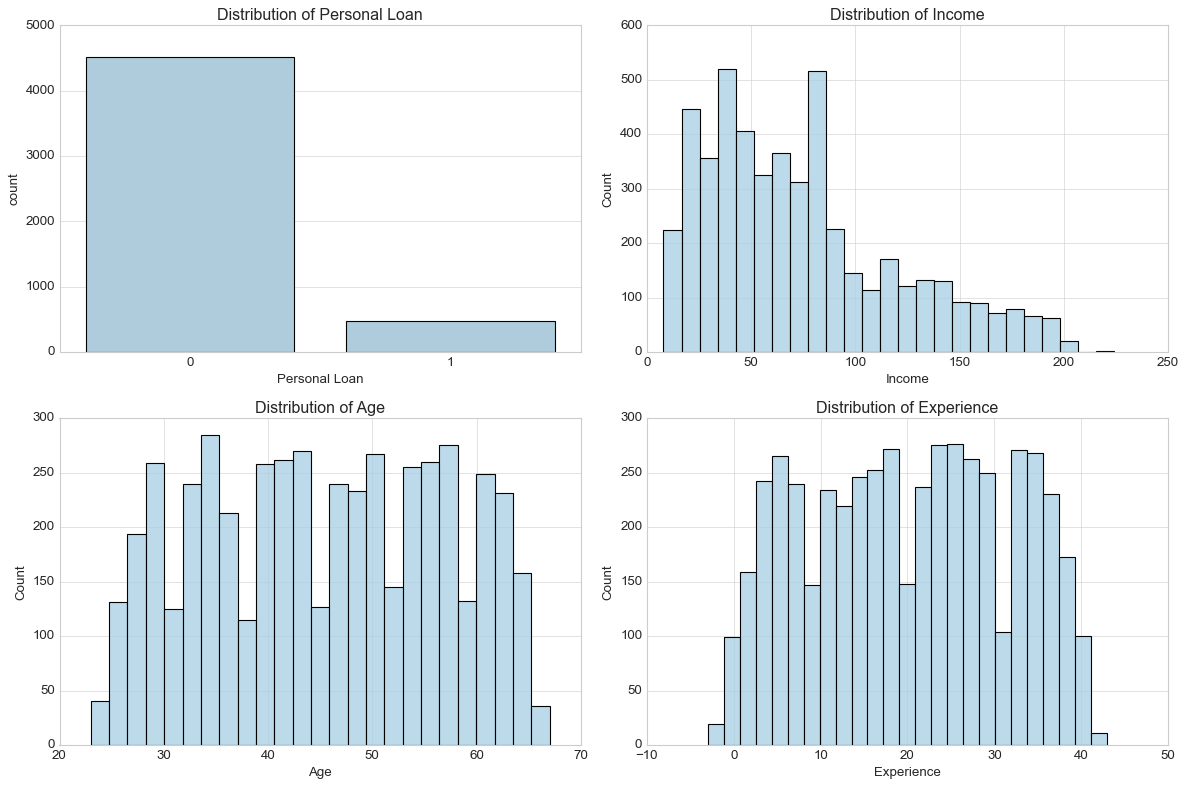

In [324]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# Distribution of Personal Loan (target variable)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Personal Loan')
plt.title('Distribution of Personal Loan')

# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Income', bins=25)
plt.title('Distribution of Income')

# Age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', bins=25)
plt.title('Distribution of Age')

# Experience distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Experience', bins=25)
plt.title('Distribution of Experience')

plt.tight_layout()
plt.savefig('personal_loan_distributions.png')
plt.show()

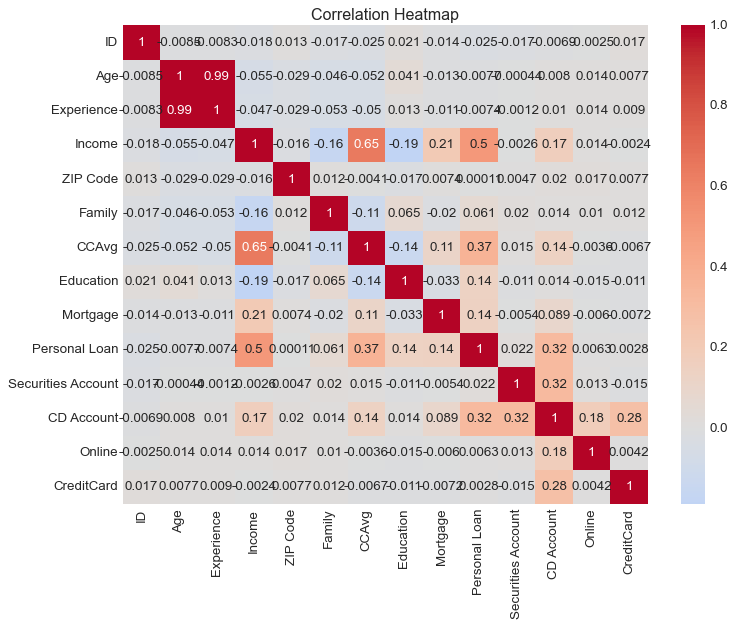

In [325]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

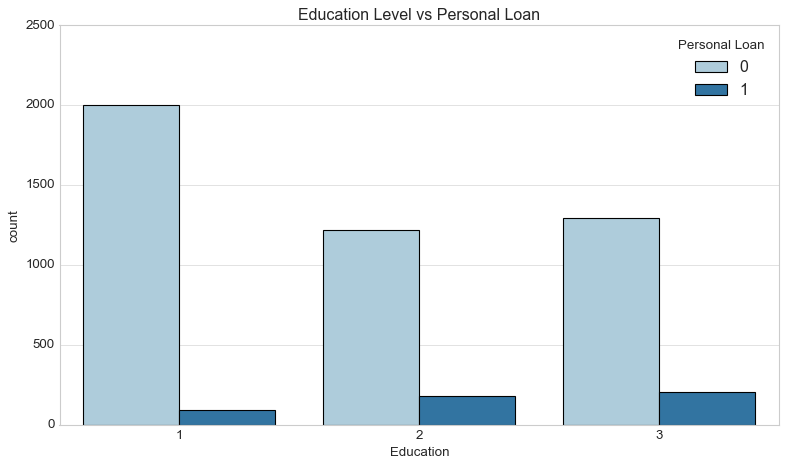

In [326]:
# Additional insights: Education level vs Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Personal Loan')
plt.title('Education Level vs Personal Loan')
plt.tight_layout()
plt.savefig('education_vs_loan.png')
plt.show()


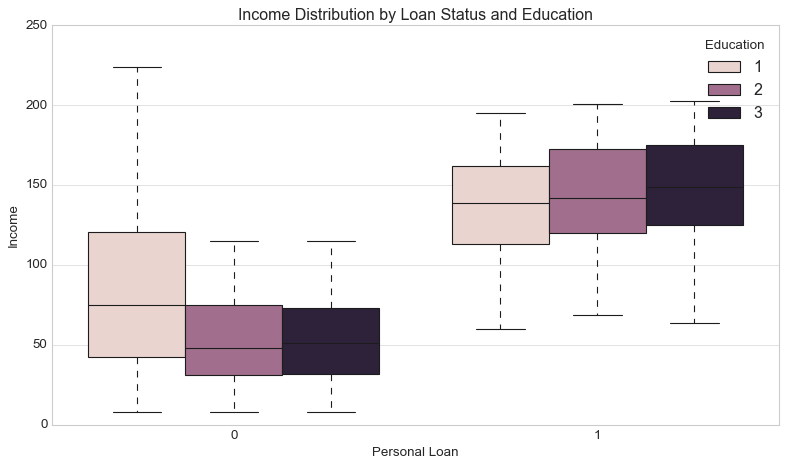

In [327]:
# Income vs Personal Loan with Education
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personal Loan', y='Income', hue='Education')
plt.title('Income Distribution by Loan Status and Education')
plt.tight_layout()
plt.savefig('income_by_loan_and_education.png')
plt.show()

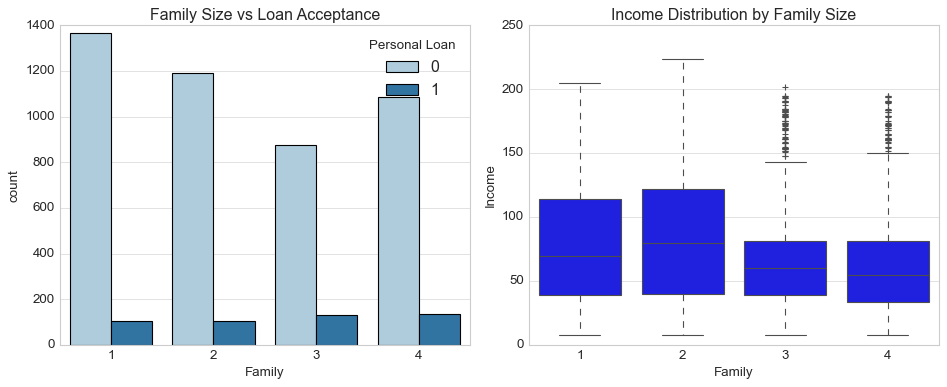

In [328]:
# Create a figure for family size analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Family', hue='Personal Loan')
plt.title('Family Size vs Loan Acceptance')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Family', y='Income')
plt.title('Income Distribution by Family Size')
plt.tight_layout()
plt.savefig('family_analysis.png')
plt.show()

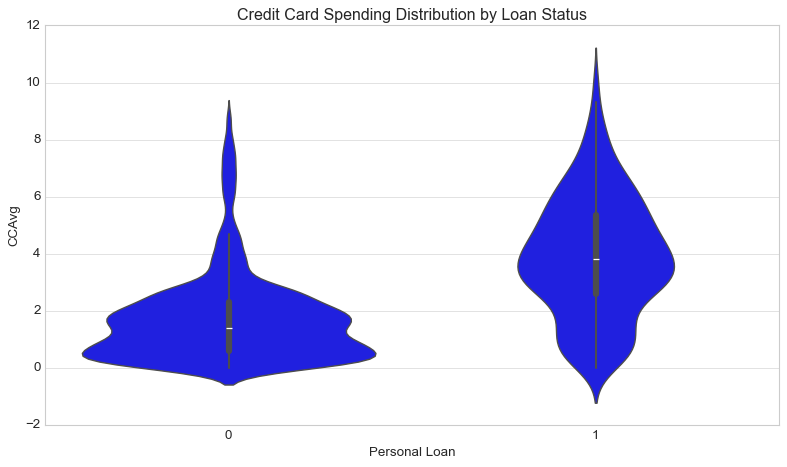

In [329]:
# Create violin plots for credit card average spending
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Personal Loan', y='CCAvg')
plt.title('Credit Card Spending Distribution by Loan Status')
plt.tight_layout()
plt.savefig('credit_spending_distribution.png')
plt.show()

**6. Step 3: ML Modeling**

The first model is a classification model, trying to predict if a customer will take a personal loan based on their income, age, education, mortgage, and credit card average usage.

In [330]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
X = df.drop(['Personal Loan', 'ID', 'ZIP Code'], axis=1)  # Remove ID and ZIP Code as they're likely not relevant
y = df['Personal Loan']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Store model performances
model_performances = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate f1-score (you could use other metrics like accuracy or precision)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_performances[name] = report['weighted avg']['f1-score']
    
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))

# Find the best model
best_model_name = max(model_performances, key=model_performances.get)
best_model = models[best_model_name]
best_score = model_performances[best_model_name]

print("\n" + "="*50)
print(f"Best performing model: {best_model_name}")
print(f"F1-Score: {best_score:.4f}")
print("="*50)

# Function to predict loan approval for a new customer
def predict_loan_approval(customer_data):

    # Convert customer data to DataFrame
    customer_df = pd.DataFrame([customer_data])
    
    # Scale the features using the same scaler used for training
    customer_scaled = scaler.transform(customer_df)
    
    # Make prediction using best model
    prediction = best_model.predict(customer_scaled)
    
    # Get probability scores if model supports it
    try:
        probability = best_model.predict_proba(customer_scaled)[0][1]
    except:
        probability = None
        
    return prediction[0], probability



Training Logistic Regression...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000


Training Random Forest...

Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000


Training SVM...

SVM Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.79      0.87       105

    accuracy                         

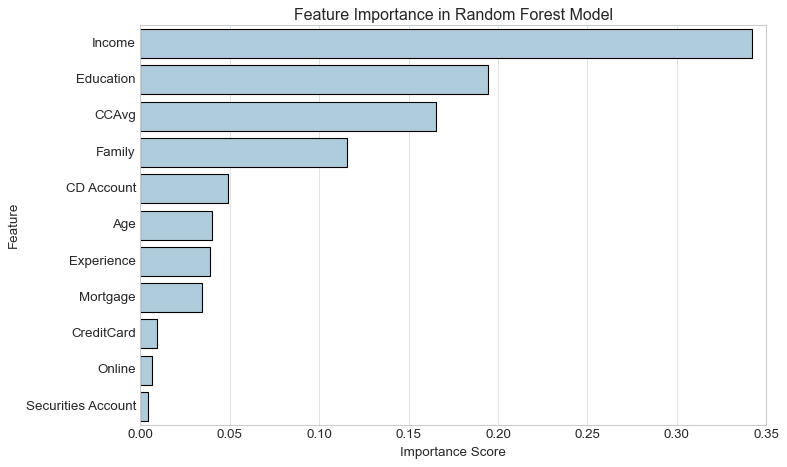


Feature Importance Ranking:
Income: 0.3423
Education: 0.1945
CCAvg: 0.1651
Family: 0.1156
CD Account: 0.0490
Age: 0.0398
Experience: 0.0391
Mortgage: 0.0345
CreditCard: 0.0092
Online: 0.0067
Securities Account: 0.0042


In [331]:
# Get feature importance from Random Forest model
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online','CreditCard']

rf_model = models['Random Forest']
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print numerical values
print("\nFeature Importance Ranking:")
for idx, row in importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

After predicting if a customer will take a personal loan, I want to predict the maximum loan amount a customer can afford based on their income, age, education, mortgage, and credit card average usage. 


In [332]:
# Create a synthetic maximum loan amount based on common banking rules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# This is a simplified example - actual banking rules are more complex
def calculate_theoretical_max_loan(row):
    # Common rules of thumb:
    # - Maximum monthly payment = 40% of monthly income
    # - Loan term = 3 years
    # - Consider existing obligations (mortgage, credit card)
    
    monthly_income = row['Income'] * 1000 / 12  # Assuming income is in thousands
    existing_obligations = (row['Mortgage'] / 120) + (row['CCAvg'] * 1000)
    available_monthly_payment = (monthly_income * 0.4) - existing_obligations
    
    # Simple present value calculation for 5-year loan at 7% annual interest
    r = 0.07 / 12  # monthly interest rate
    n = 60         # number of months
    max_loan = available_monthly_payment * ((1 - (1 + r)**(-n)) / r)
    
    return max(0, max_loan)  # Ensure non-negative

# Create target variable
df['Theoretical_Max_Loan'] = df.apply(calculate_theoretical_max_loan, axis=1)

# Prepare features for regression
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage']
X = df[features]
y = df['Theoretical_Max_Loan']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

# Function to predict max loan for new customers
def predict_max_loan(model, customer_data):
    customer_scaled = scaler.transform(customer_data)
    predicted_amount = model.predict(customer_scaled)[0]
    return max(0, predicted_amount)


Training Linear Regression...
R2 Score: 0.905
RMSE: $16,481.55

Training Random Forest...
R2 Score: 0.999
RMSE: $2,020.42


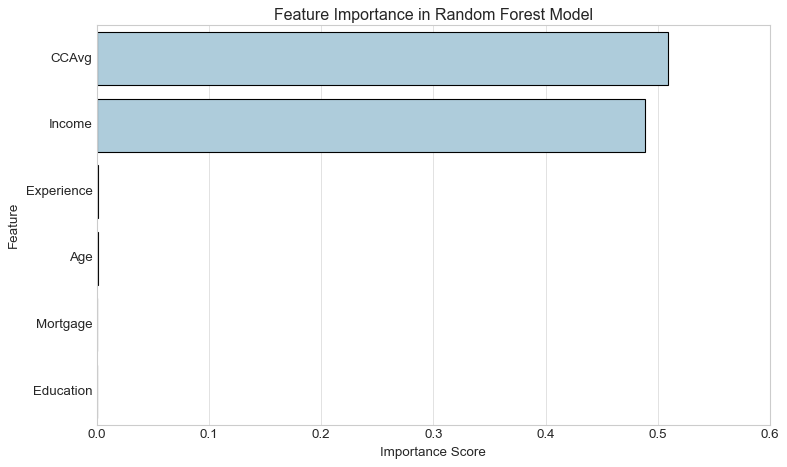


Feature Importance Ranking:
CCAvg: 0.5093
Income: 0.4888
Experience: 0.0007
Age: 0.0007
Mortgage: 0.0003
Education: 0.0002


In [333]:
# Get feature importance from Random Forest model
rf_model = models['Random Forest']
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print numerical values
print("\nFeature Importance Ranking:")
for idx, row in importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

*After developing two models to predict if a customer will take a personal loan and the maximum loan amount a customer can afford, I want to test the models with different customer profiles.*

*Bellow are 5 different customer profiles with different characteristics to whom I will apply the models.*


In [334]:
#Test different customer profiles
example_customers = pd.DataFrame({
    'Age':                 [28,    42,    24,    52,    65],
    'Experience':          [5,     18,    1,     25,    35],
    'Income':             [75,    120,    45,    250,    90],
    'Family':             [1,     4,     1,     3,     2],
    'CCAvg':              [2.5,   3.5,   1.0,   8.0,   2.0],
    'Education':          [2,     3,     1,     3,     2],  # 1=Undergrad, 2=Graduate, 3=Professional
    'Mortgage':           [150,   300,    0,     500,    50],
    'Securities Account': [1,     1,     0,     1,     1],
    'CD Account':         [0,     1,     0,     1,     1],
    'Online':             [1,     1,     1,     0,     0],
    'CreditCard':         [1,     1,     1,     1,     0]
}, index=['Young_Professional', 'Mid_Career_Parent', 'Recent_Graduate', 'Senior_Executive', 'Retiree'])

In [335]:
# Create empty lists to store results
results = []

for idx, customer in example_customers.iterrows():
    prediction, probability = predict_loan_approval(customer)
    
    # Calculate max loan if approved
    max_loan = 0
    if prediction == 1:
        loan_features = customer[['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage']].to_frame().T
        max_loan = predict_max_loan(models['Random Forest'], loan_features)
    
    # Add results to list
    results.append({
        'Customer Type': idx,
        'Income': f"${customer['Income']*1000:,.0f}",
        'Education': ['Undergrad', 'Graduate', 'Professional'][int(customer['Education'])-1],
        'Age': customer['Age'],
        'Experience': f"{customer['Experience']} years",
        'Mortgage': f"${customer['Mortgage']*1000:,.0f}",
        'Loan Decision': 'Approved' if prediction == 1 else 'Not Approved',
        'Approval Probability': f"{probability:.2%}",
        'Max Loan Amount': f"${max_loan:,.2f}" if prediction == 1 else 'N/A'
    })

# Create and display DataFrame
results_df = pd.DataFrame(results)
display(results_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CD Account
- CreditCard
- Family
- Online
- Securities Account
